# COMP47670 Assignment 1: Data Collection & Preparation
### Kate Kiernan (14324876)

Step 1: Data identification and collection

In [1]:
import urllib.request as request
import pandas as pd
%matplotlib inline

In [2]:
#Import CSV file on exoplanets from NASA's list of open API's available at https://api.nasa.gov/
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_hostname,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_bmassj,pl_radj,ra,dec,st_optmag,st_optband,gaia_gmag,st_teff,st_mass,st_rad"
pd.set_option('max_columns', None) #Set max columns as None to show all features in the table

#Use panda's read_csv function to display the dataframe in a readable table
exo = pd.read_csv(url)

#Save to a CSV file for future analysis
exo.to_csv('exoplanets.csv')

#Display the first 5 items in the dataframe
exo.head()

,pl_hostname,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_bmassj,pl_radj,ra,dec,st_optmag,st_optband,gaia_gmag,st_teff,st_mass,st_rad
0,Kepler-138,Kepler-138 c,Transit,3,13.781300,0.00620,0.107,290.381547,43.292973,12.925,Kepler-band,12.472,3841.0,0.52,0.44
1,Kepler-138,Kepler-138 d,Transit,3,23.088100,0.00201,0.108,290.381547,43.292973,12.925,Kepler-band,12.472,3841.0,0.52,0.44
2,Kepler-139,Kepler-139 b,Transit,2,15.771044,NaN,0.262,282.391957,43.889351,12.701,Kepler-band,12.677,5594.0,NaN,1.30
3,Kepler-139,Kepler-139 c,Transit,2,157.072878,NaN,0.302,282.391957,43.889351,12.701,Kepler-band,12.677,5594.0,NaN,1.30
4,Kepler-140,Kepler-140 b,Transit,2,3.254270,NaN,0.144,287.369468,46.768213,12.996,Kepler-band,12.941,6077.0,NaN,1.29


This dataset contains a list of confimed exoplanets that have been reserved, and information about the planets and their host stars.

Step 2: Clean the data

In [3]:
#Set the name of the planet's host star as the index and rename the index and columns 
exo=exo.set_index('pl_hostname')
exo.index.names = ['Host Star']
exo = exo.rename(columns = {'pl_letter':'Planet Letter', 'pl_name':'Planet Name', 'pl_discmethod':'Discovery Method',
                            'pl_pnum':'Planets in System', 'pl_orbper':'Orbital Period', 'pl_bmassj':'Planet Mass (Jupiter Mass)',
                            'pl_radj':'Planet Radius (Jupiter Radius)', 'pl_dens':'Density (g/cm^3)', 'ra':'R.A. (degrees)',
                            'dec':'Dec (degrees)', 'st_optmag':'Optical Magnitude', 'st_optband':'Optical Magnitude Band',
                            'gaia_gmag':'Gaia Magnitude', 'st_teff':'Effective Temperature', 'st_mass':'Stellar Mass',
                            'st_rad':'Stellar Radius'})

exo.head()

,Planet Name,Discovery Method,Planets in System,Orbital Period,Planet Mass (Jupiter Mass),Planet Radius (Jupiter Radius),R.A. (degrees),Dec (degrees),Optical Magnitude,Optical Magnitude Band,Gaia Magnitude,Effective Temperature,Stellar Mass,Stellar Radius
Host Star,,,,,,,,,,,,,,
Kepler-138,Kepler-138 c,Transit,3,13.781300,0.00620,0.107,290.381547,43.292973,12.925,Kepler-band,12.472,3841.0,0.52,0.44
Kepler-138,Kepler-138 d,Transit,3,23.088100,0.00201,0.108,290.381547,43.292973,12.925,Kepler-band,12.472,3841.0,0.52,0.44
Kepler-139,Kepler-139 b,Transit,2,15.771044,NaN,0.262,282.391957,43.889351,12.701,Kepler-band,12.677,5594.0,NaN,1.30
Kepler-139,Kepler-139 c,Transit,2,157.072878,NaN,0.302,282.391957,43.889351,12.701,Kepler-band,12.677,5594.0,NaN,1.30
Kepler-140,Kepler-140 b,Transit,2,3.254270,NaN,0.144,287.369468,46.768213,12.996,Kepler-band,12.941,6077.0,NaN,1.29


In [4]:
#Check for empty values in the columns
exo.isnull().sum()

Planet Name                          0
Discovery Method                     0
Planets in System                    0
Orbital Period                     143
Planet Mass (Jupiter Mass)        2515
Planet Radius (Jupiter Radius)    1006
R.A. (degrees)                       0
Dec (degrees)                        0
Optical Magnitude                  228
Optical Magnitude Band             228
Gaia Magnitude                     177
Effective Temperature              282
Stellar Mass                       810
Stellar Radius                     402
dtype: int64

In [5]:
#Save a copy of the dataframe before cleaning
exo_dirty = exo.copy(deep=True)

In [6]:
#For columns with smalll numbers of unknown values, estimate the values using the mean
mean_per = exo['Orbital Period'].mean()
exo['Orbital Period'] = exo['Orbital Period'].fillna(mean_per)

mean_opt = exo['Optical Magnitude'].mean()
exo['Optical Magnitude'] = exo['Optical Magnitude'].fillna(mean_opt)

unknown_magBand = 'Unknown'
exo['Optical Magnitude Band'] = exo['Optical Magnitude Band'].fillna(unknown_magBand)

mean_gaia = exo['Gaia Magnitude'].mean()
exo['Gaia Magnitude'] = exo['Gaia Magnitude'].fillna(mean_gaia)

mean_temp = exo['Effective Temperature'].mean()
exo['Effective Temperature'] = exo['Effective Temperature'].fillna(mean_temp)

mean_stMass = exo['Stellar Mass'].mean()
exo['Stellar Mass'] = exo['Stellar Mass'].fillna(mean_stMass)

mean_stRad = exo['Stellar Radius'].mean()
exo['Stellar Radius'] = exo['Stellar Radius'].fillna(mean_stRad)

exo.isnull().sum()

Planet Name                          0
Discovery Method                     0
Planets in System                    0
Orbital Period                       0
Planet Mass (Jupiter Mass)        2515
Planet Radius (Jupiter Radius)    1006
R.A. (degrees)                       0
Dec (degrees)                        0
Optical Magnitude                    0
Optical Magnitude Band               0
Gaia Magnitude                       0
Effective Temperature                0
Stellar Mass                         0
Stellar Radius                       0
dtype: int64

There are too many missing values for the planet mass and radius to replace with the mean values. Dropping the rows with missing values in these columns would result in losing a lot of valuable information.

Instead, make a subset of the data including only items where the planet's mass and radius are known to use when analysing
this information.

In [7]:
#Drop all rows that have missing values in either the Planet Mass or Planet Radius column
exo_knownMass = exo.dropna(how='any', subset=['Planet Mass (Jupiter Mass)', 'Planet Radius (Jupiter Radius)'])
exo_knownMass

,Planet Name,Discovery Method,Planets in System,Orbital Period,Planet Mass (Jupiter Mass),Planet Radius (Jupiter Radius),R.A. (degrees),Dec (degrees),Optical Magnitude,Optical Magnitude Band,Gaia Magnitude,Effective Temperature,Stellar Mass,Stellar Radius
Host Star,,,,,,,,,,,,,,
Kepler-138,Kepler-138 c,Transit,3,13.781300,0.00620,0.107,290.381547,43.292973,12.925000,Kepler-band,12.472,3841.0,0.52,0.44
Kepler-138,Kepler-138 d,Transit,3,23.088100,0.00201,0.108,290.381547,43.292973,12.925000,Kepler-band,12.472,3841.0,0.52,0.44
Kepler-145,Kepler-145 b,Transit,2,22.951000,0.11700,0.236,291.387762,44.529106,11.931000,Kepler-band,11.875,6022.0,1.28,1.98
Kepler-145,Kepler-145 c,Transit,2,42.882000,0.25000,0.385,291.387762,44.529106,11.931000,Kepler-band,11.875,6022.0,1.28,1.98
HAT-P-38,HAT-P-38 b,Transit,1,4.640382,0.26700,0.825,35.383234,32.246151,12.557000,V (Johnson),12.302,5330.0,0.89,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD 95338,HD 95338 b,Radial Velocity,1,55.087000,0.13353,0.347,164.859604,-56.623039,8.611000,V (Johnson),8.382,5212.0,0.83,0.87
TOI-1899,TOI-1899 b,Transit,1,29.020000,0.66000,1.370,299.426833,40.143347,12.669654,Unknown,13.555,3841.0,0.63,0.61
HIP 65 A,HIP 65 A b,Transit,1,0.980973,3.21300,2.030,0.185667,-54.830814,11.130000,V (Johnson),10.590,4590.0,0.78,0.72


In [8]:
#Check for null values again
exo_knownMass.isnull().sum()

Planet Name                       0
Discovery Method                  0
Planets in System                 0
Orbital Period                    0
Planet Mass (Jupiter Mass)        0
Planet Radius (Jupiter Radius)    0
R.A. (degrees)                    0
Dec (degrees)                     0
Optical Magnitude                 0
Optical Magnitude Band            0
Gaia Magnitude                    0
Effective Temperature             0
Stellar Mass                      0
Stellar Radius                    0
dtype: int64

In this subset dataframe, there are no longer any missing values.

Step 3: Analyse the data

In [9]:
#Get a summary of the data
exo.describe()

,Planets in System,Orbital Period,Planet Mass (Jupiter Mass),Planet Radius (Jupiter Radius),R.A. (degrees),Dec (degrees),Optical Magnitude,Gaia Magnitude,Effective Temperature,Stellar Mass,Stellar Radius
count,4301.000000,4.301000e+03,1786.000000,3295.000000,4301.000000,4301.000000,4301.000000,4301.000000,4301.000000,4301.000000,4301.000000
mean,1.773774,2.071079e+03,2.420005,0.379361,243.213433,22.096254,12.669654,12.556022,5475.514613,0.984532,1.537158
std,1.151024,1.113477e+05,4.391499,0.426671,87.108183,33.552088,2.872769,2.924108,1685.852515,0.465092,3.676522
min,1.000000,9.070629e-02,0.000060,0.030000,0.185667,-84.231613,0.850000,2.804000,575.000000,0.010000,0.010000
25%,1.000000,4.612200e+00,0.068748,0.141000,202.331421,-1.296439,11.570000,11.366000,5060.000000,0.850000,0.810000
50%,1.000000,1.261191e+01,0.790000,0.210000,287.326624,40.663406,13.438000,13.374000,5527.000000,0.984532,1.020000
75%,2.000000,5.176000e+01,2.430000,0.323500,293.758347,45.762142,14.827000,14.790000,5899.250000,1.080000,1.410000
max,8.000000,7.300000e+06,55.590000,6.900000,359.974304,85.736153,20.150000,20.480000,57000.000000,10.940000,83.800000


Using this summary I can find out many details about the observed exoplanets and their systems, such as:

1. The maximum number of observed planets in a system is 8.
2. The majority of stars have 2 or fewer observed planets.
3. The mean effective temperature of the observed stars is 5475.5 K.
4. The most massive star observed has a mass of ~10.94 times the mass of the sun.
5. The largest planet observed has a radius of 6.9 times the radius of Jupiter.
6. The most massive planet observed has a mass of 55.59 times the mass of Jupiter.
7. The hottest host star observed has an effective temperature of 57000 K.
8. 75% of the observed stars have a mass and radius of 1.08 stellar masses and 1.41 steller radius or less, respectively.

In [10]:
#Get the mean of each column
exo.mean()

Planets in System                    1.773774
Orbital Period                    2071.079059
Planet Mass (Jupiter Mass)           2.420005
Planet Radius (Jupiter Radius)       0.379361
R.A. (degrees)                     243.213433
Dec (degrees)                       22.096254
Optical Magnitude                   12.669654
Gaia Magnitude                      12.556022
Effective Temperature             5475.514613
Stellar Mass                         0.984532
Stellar Radius                       1.537158
dtype: float64

From this, the mean of each feature of the dataset can be analysed. It can be seen that the mean number of planets discovered in each system is ~1.77. The mean mass of the planets is 2.42 times the mass of Jupiter and the mean radius is ~0.38 times the radius of Jupiter. This means that many of the planets discovered had much larger masses than Jupiter, but were smaller planets.

In [11]:
exo.std()

Planets in System                      1.151024
Orbital Period                    111347.657583
Planet Mass (Jupiter Mass)             4.391499
Planet Radius (Jupiter Radius)         0.426671
R.A. (degrees)                        87.108183
Dec (degrees)                         33.552088
Optical Magnitude                      2.872769
Gaia Magnitude                         2.924108
Effective Temperature               1685.852515
Stellar Mass                           0.465092
Stellar Radius                         3.676522
dtype: float64

By obtaining the standard deviation it can be seen that 68% of host stars have an effective temperature of ~5475.51 +/- 1685.85 K, with a mass of 0.98 +/- 0.47 stellar masses and a radius of 1.54 +/- 3.68 stellar radii.

Visualisation:

First, plot the radii of the exoplanets against their masses:

Text(0.5, 1.0, 'Exoplanet Radius vs Mass (in Jupiter Radii and Masses)')

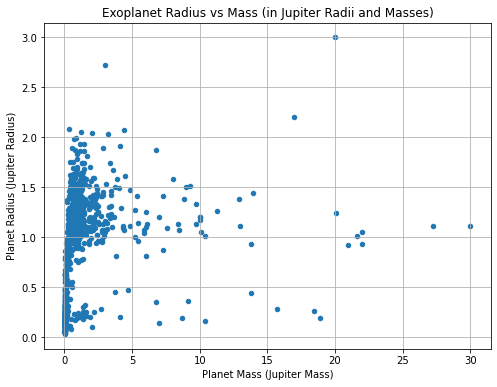

In [12]:
p1 = exo_knownMass.plot(kind='scatter', x='Planet Mass (Jupiter Mass)', y='Planet Radius (Jupiter Radius)', figsize = (8,6))
p1.grid(True)
p1.set_title('Exoplanet Radius vs Mass (in Jupiter Radii and Masses)')

From this plot we can see that the majority of the observed exoplanets have a mass that is between 0 and 5 times the mass of Jupiter, and a radius of 0 - 2 times that of Jupiter.

Next, plot the measured brightness of the host star as observed through the V (Johnson) or Kepler-band against the measured brightness as observed through the Gaia-band.

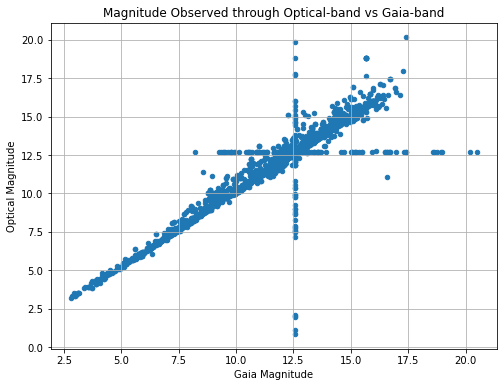

In [13]:
p2 = exo.plot(kind='scatter', x='Gaia Magnitude', y='Optical Magnitude', figsize = (8,6))
p2.set_title('Magnitude Observed through Optical-band vs Gaia-band')
p2.grid(True)
p2

The results of this plot are mostly linear, which means that the observed magnitudes for the stars were roughly equal for observations in both bands.

However, substituting the mean for missing values has resulted in a lot of outlier values. A better result could be achieved by analysing only the items where values were measured. This can be done using the copy of the unclean data that was made at the beginning. 

In [14]:
#Drop all missing values for the host star magnitude
exo_dirty = exo_dirty.dropna(how='all', subset=['Optical Magnitude', 'Gaia Magnitude'])

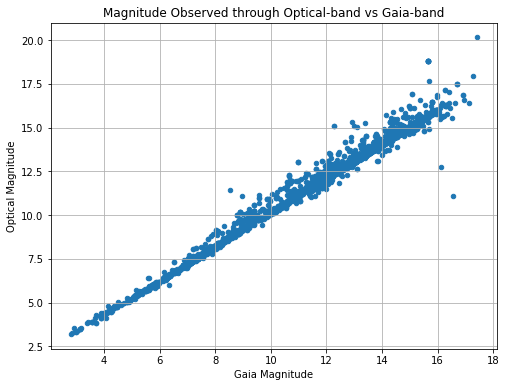

In [15]:
p2_edit = exo_dirty.plot(kind='scatter', x='Gaia Magnitude', y='Optical Magnitude', figsize = (8,6))
p2_edit.set_title('Magnitude Observed through Optical-band vs Gaia-band')
p2_edit.grid(True)
p2_edit

Now the results are more accurate. It would appear that the host stars' magnitude observed in the Gaia-band is slightly lower than when observed through the optical bands. This could be analysed more accurately by getting the line of best fit through the data and calculating its slope.

The third graph will plot the effective temperature of the host star against its radius.

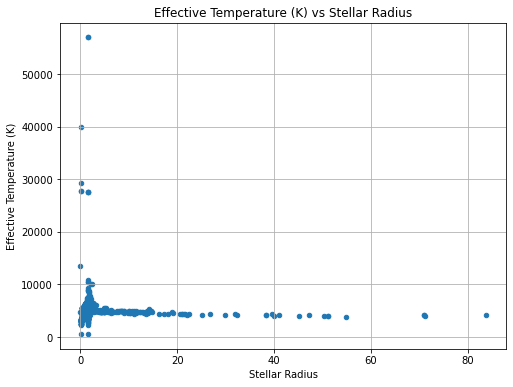

In [16]:
p3 = exo.plot(kind='scatter', x='Stellar Radius', y='Effective Temperature', figsize = (8,6))
p3.set_ylabel('Effective Temperature (K)')
p3.set_title('Effective Temperature (K) vs Stellar Radius')
p3.grid(True)

From this graph it can be observed that the effective temperature of the host stars mostly lie between 0 and 10000 Kelvin for stars with radii between 0 and 20 times the radius of the sun. There are a small number of small stars with extremely high temperatures. Larger stars (betweeen ~10-90 stellar radii) have cooler temperatures.

All of these results could be analysed further by fitting a model to the plot (e.g. a straight line graph) and calculating their slopes. By removing outliers, a more accurate equation describing each plot could be obtained.

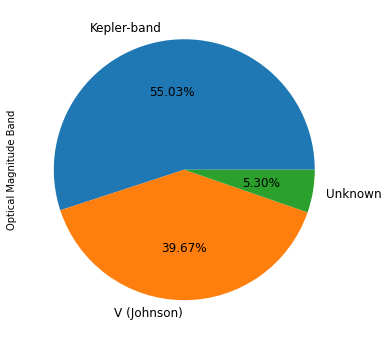

In [17]:
#Calculate the number of exoplanets observed through each optical band
opt_band = exo['Optical Magnitude Band'].value_counts()
p4 = opt_band.plot(kind='pie', autopct='%.2f%%', fontsize=12, figsize=(6,6))

From this plot it can be observed that over half the stars (55.03%) were observed in the Kepler-band, and only 39.67% were observed in the V (Johnson)-band. The optical band in which the remaning 5.3% were observed was not recorded.

Text(0, 0.5, 'Number of Planets Discovered')

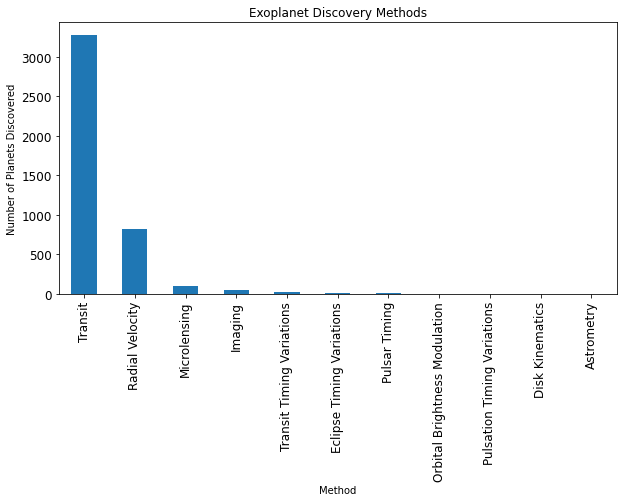

In [18]:
#Calculate the number of planets discovered using each method
method = exo['Discovery Method'].value_counts()
p5 = method.plot(kind='bar', fontsize=12, figsize=(10,5))
p5.set_title('Exoplanet Discovery Methods')
p5.set_xlabel('Method')
p5.set_ylabel('Number of Planets Discovered')

From this bar chart it can be noted that the majority of exoplanets were discovered using the transit method. Less than 1000 were discovered by radial velocity, and very few were discovered by other methods.

Text(0, 0.5, 'Number of Systems')

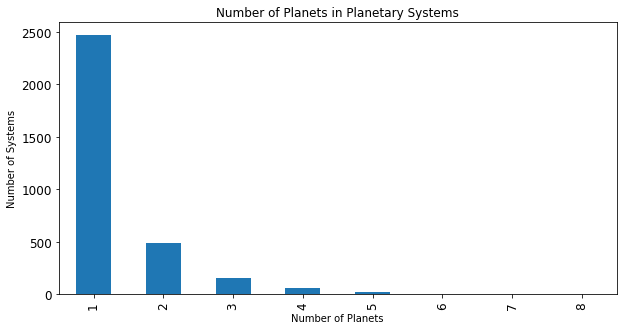

In [20]:
#Group the planets by their host stars
planets = exo.groupby('Host Star')

#Get the mean number of planets for each star because the number will be counted for each
mean_np=planets.mean()

#Plot the number of planets orbiting each star
num_planets = mean_np['Planets in System'].value_counts()
num_planets

p6 = num_planets.plot(kind='bar', fontsize=12, figsize=(10,5))
p6.set_title('Number of Planets in Planetary Systems')
p6.set_xlabel('Number of Planets')
p6.set_ylabel('Number of Systems')

From this chart it can be seen that there are almost 2500 stars with a single planet observed in their orbit, ~500 systems with two observed planets, and few stars with three or more planets.